# Create app to build images of cities connected by dots

In [1]:
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from PIL import Image, ImageDraw


### Step 2: Get GPS Coordinates of Cities
Use Geopy's Nominatim to fetch GPS coordinates of cities. You can make a function to simplify this:

In [27]:
def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="city_mapper")
    location = geolocator.geocode(city_name)
    return (location.latitude, location.longitude)


### Step 3: Prepare Cities and Coordinates
Create a list of cities you want to connect, then fetch their coordinates:

In [28]:
cities = ["New York, USA", "London, UK", "Paris, France", "Berlin, Germany"]

# cities = ["Leipzig, Germany", "Berlin, Germany", "Erfurt, Germany"]

coordinates = [get_coordinates(city) for city in cities]


### Step 4: Plot Cities and Connect Them
Now, plot the cities and draw lines connecting them. Use Matplotlib to create the visualization.

In [29]:
import matplotlib.pyplot as plt

def plot_cities(coordinates, cities):
    # Unpack the coordinates
    latitudes, longitudes = zip(*coordinates)

    fig, ax = plt.subplots(figsize=(8, 6))

    # Set background colors
    fig.patch.set_facecolor("#FFDAB9")
    ax.set_facecolor("#FFDAB9")

    # Plot each city as a point
    ax.scatter(longitudes, latitudes, color="red", zorder=5)

    # Annotate cities
    for i, city in enumerate(cities):
        ax.text(
            longitudes[i] + 0.15,
            latitudes[i] + 0.01,
            city,
            fontsize=9
        )

    # Draw dotted lines connecting the cities
    ax.plot(
        longitudes,
        latitudes,
        color="#556B2F",
        linewidth=3,
        linestyle=":",
        zorder=3
    )

    # Remove axes and frame
    ax.axis("off")
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.show()


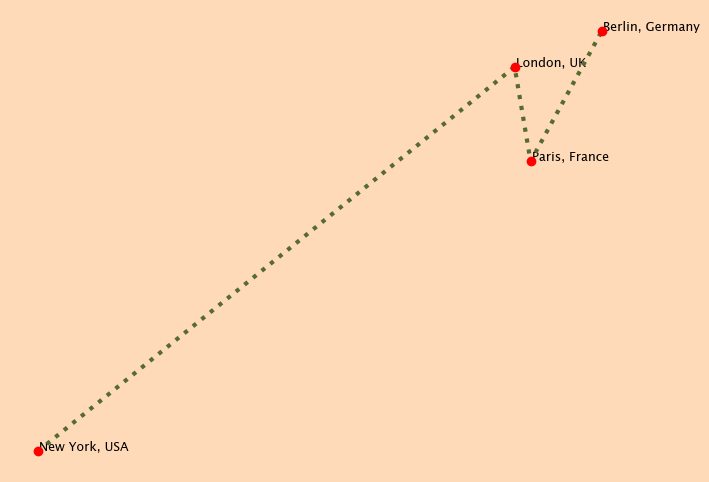

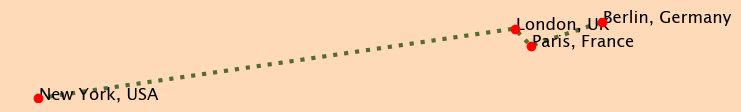

In [31]:
plot_cities(coordinates, cities)
save_image(coordinates, cities, "cities.png")


This will create a plot of cities with lines connecting them.

### Step 5: Calculate Distances Between Cities (Optional)
You can also calculate the distances between the cities using Geopy’s geodesic method:

In [32]:
def calculate_distances(coordinates):
    distances = []
    for i in range(len(coordinates) - 1):
        # Calculate distance and round to 2 decimal places (or change as needed)
        distance = round(geodesic(coordinates[i], coordinates[i+1]).kilometers, 1)
        distances.append(distance)
    return distances

distances = calculate_distances(coordinates)
print("Rounded distances between cities in kilometers:", distances)


Rounded distances between cities in kilometers: [5585.2, 344.1, 879.4]


### Step 6: Save the Image
You can now use Pillow to save this plot as an image:

In [34]:
import matplotlib.pyplot as plt

def save_image(coordinates, cities, filename="cities.png"):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Set background color (figure + axes)
    fig.patch.set_facecolor("#FFDAB9")
    ax.set_facecolor("#FFDAB9")

    # Unpack coordinates
    latitudes, longitudes = zip(*coordinates)

    # Plot city points
    ax.scatter(longitudes, latitudes, color="red", zorder=5)

    # Plot dotted route
    ax.plot(
        longitudes,
        latitudes,
        color="#556B2F",
        linewidth=3,
        linestyle=":",
        zorder=3
    )

    # Annotate cities
    for i, city in enumerate(cities):
        ax.text(
            longitudes[i] + 0.15,
            latitudes[i] + 0.01,
            city,
            fontsize=12
        )

    # Remove axes and frame
    ax.axis("off")
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Keep geographic proportions
    ax.set_aspect("equal", adjustable="box")

    # Save image (important!)
    fig.savefig(
        filename,
        dpi=300,
        facecolor=fig.get_facecolor()
    )

    plt.show()
    plt.close(fig)
    save_image(coordinates, cities, "cities.png")


### Step 7: Display the Saved Image (Optional)

In [25]:
def display_image():
    img = Image.open("cities.png")
    img.show()

display_image()


FileNotFoundError: [Errno 2] No such file or directory: 'cities.png'

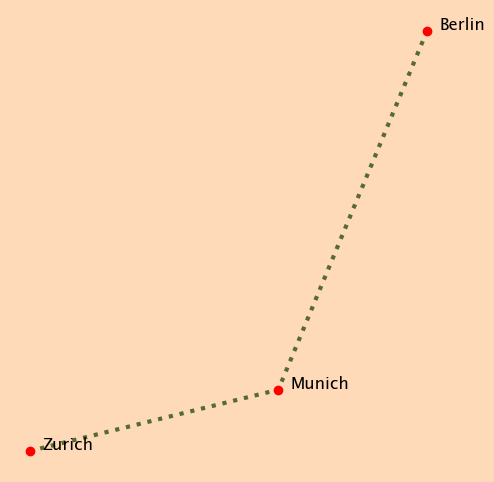

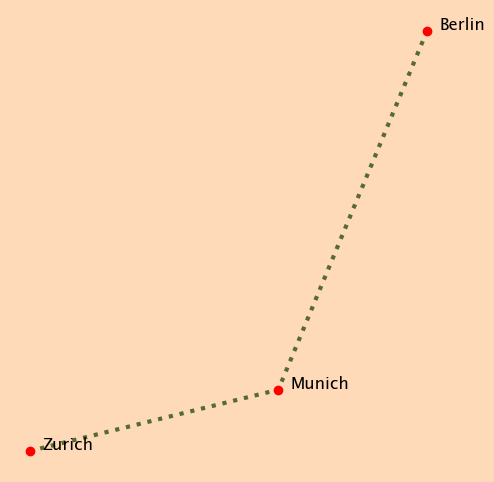

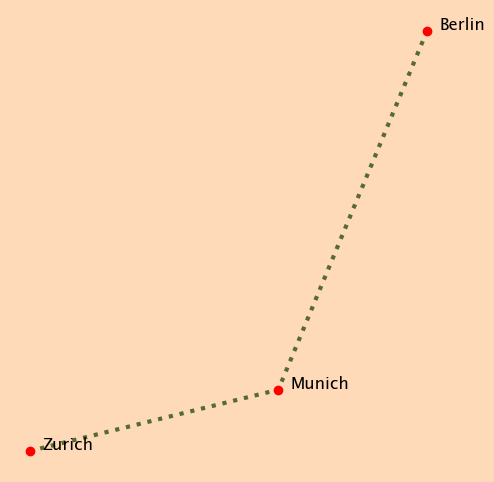

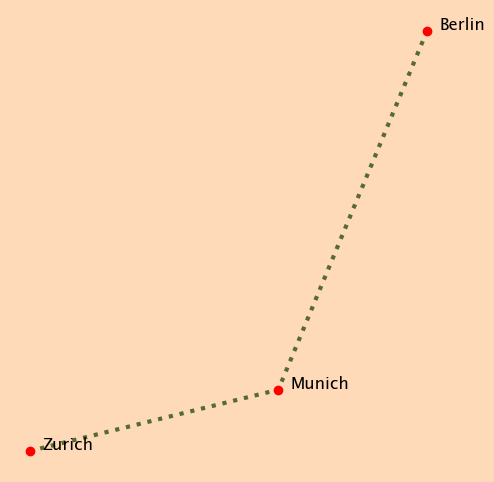

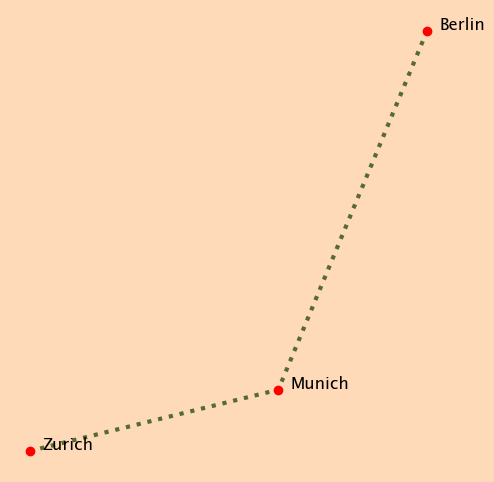

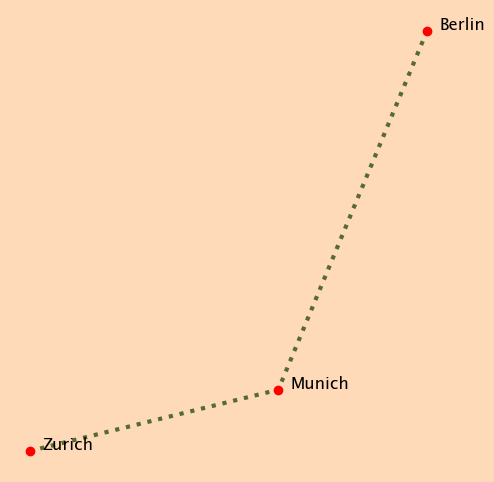

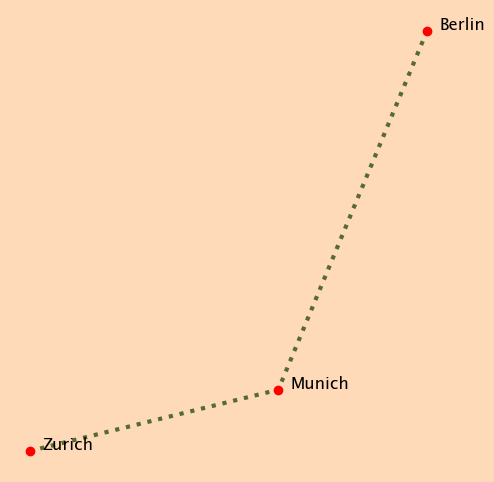

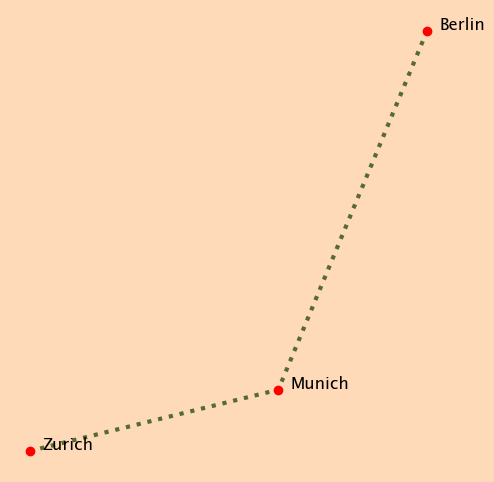

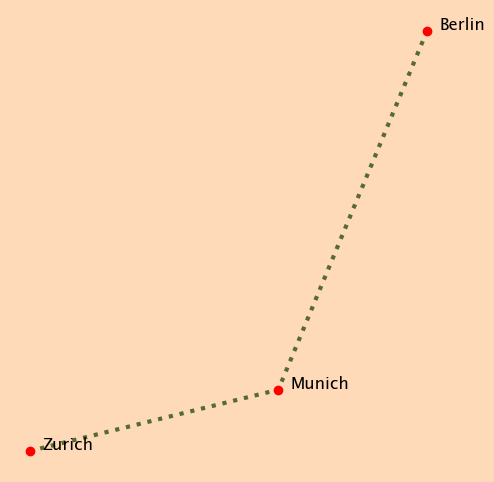

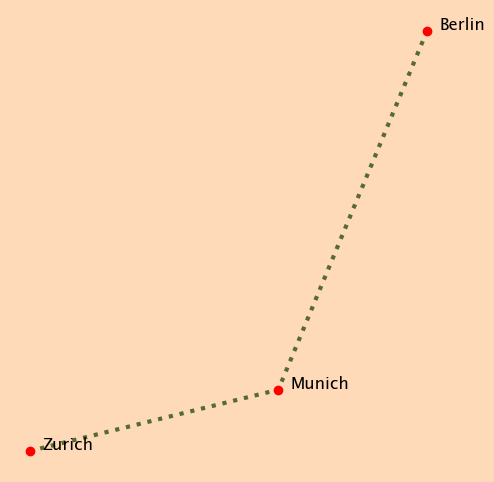

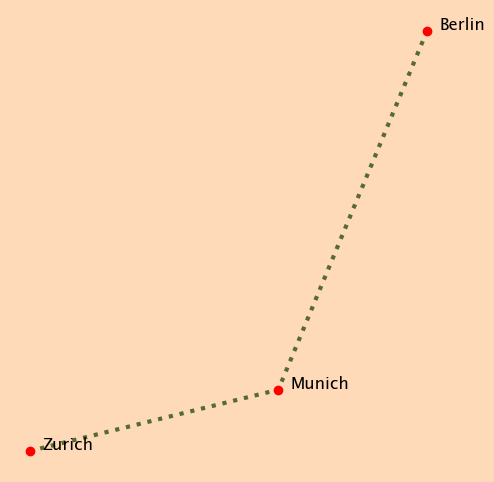

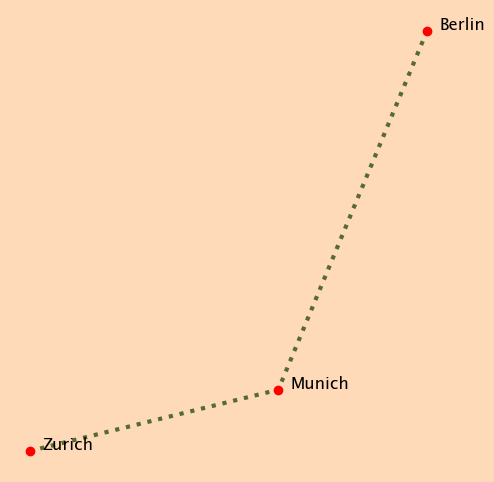

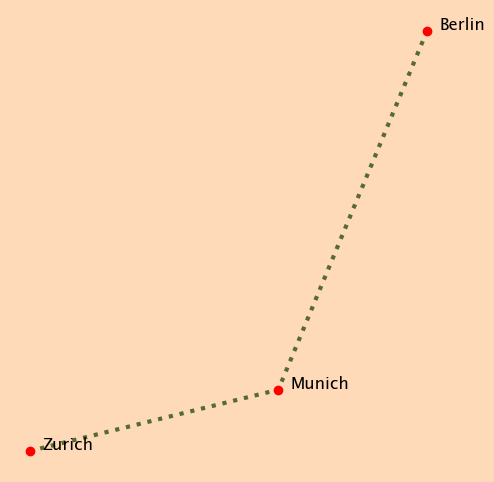

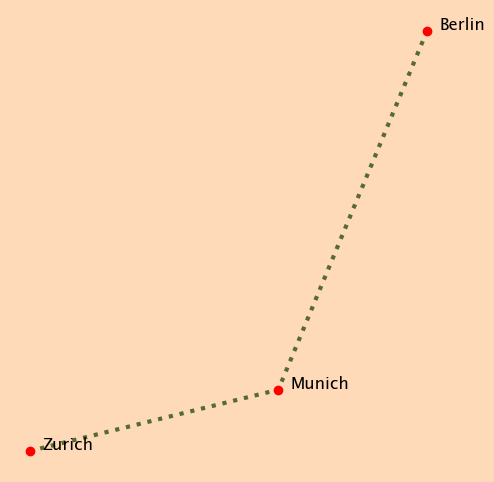

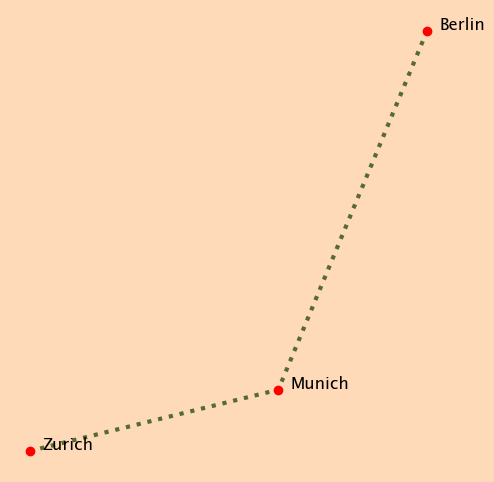

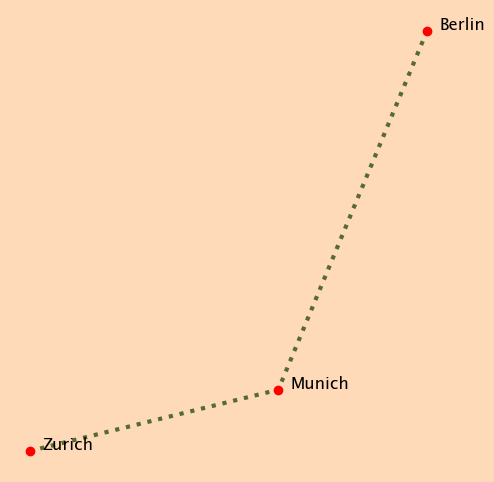

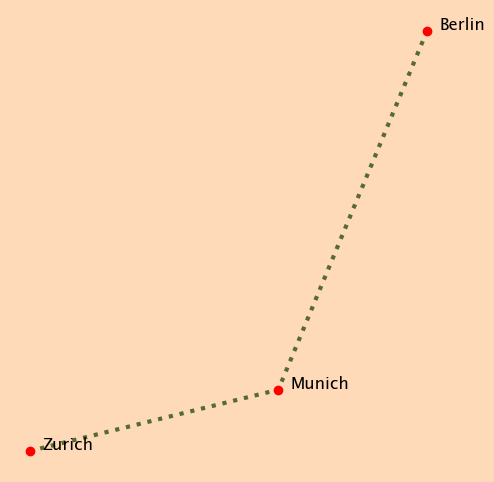

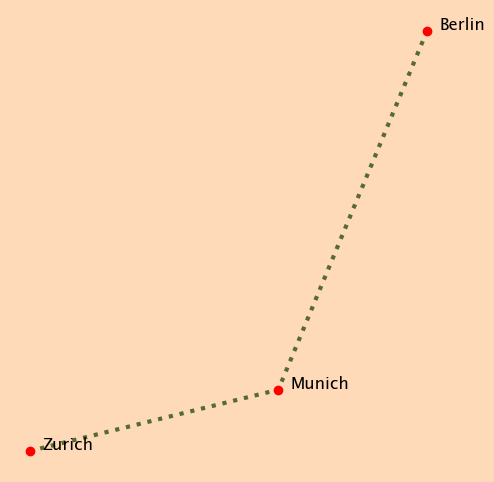

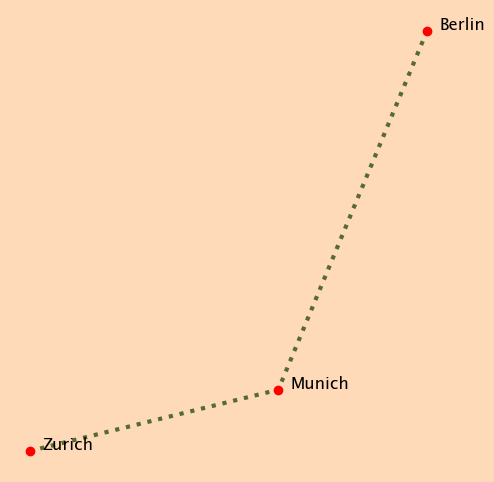

KeyboardInterrupt: 

<Figure size 800x600 with 0 Axes>

In [ ]:
coordinates = [(52.52, 13.40), (48.13, 11.58), (47.38, 8.54)]
cities = ["Berlin", "Munich", "Zurich"]

plt.close(fig)
save_image(coordinates, cities, "cities_route.png")


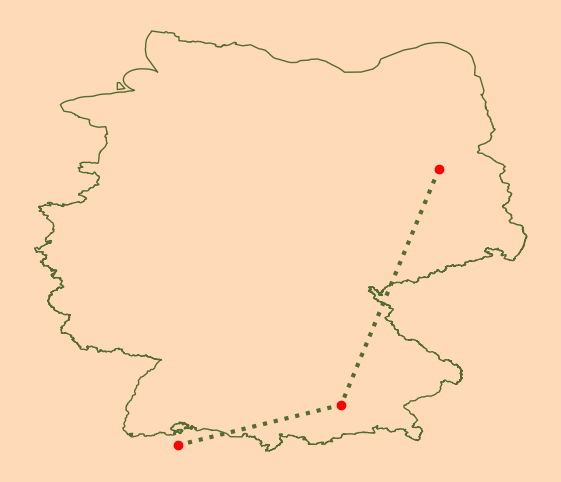

In [39]:
import osmnx as ox
import matplotlib.pyplot as plt

# Country background
country = ox.geocode_to_gdf("Germany")

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor("#FFDAB9")
ax.set_facecolor("#FFDAB9")

country.plot(
    ax=ax,
    color="#FFDAB9",
    edgecolor="#556B2F",
    linewidth=1
)

# Your route
latitudes, longitudes = zip(*coordinates)
ax.plot(longitudes, latitudes, color="#556B2F", linestyle=":", linewidth=3)
ax.scatter(longitudes, latitudes, color="red", zorder=5)

ax.axis("off")
ax.set_aspect("equal")
plt.show()


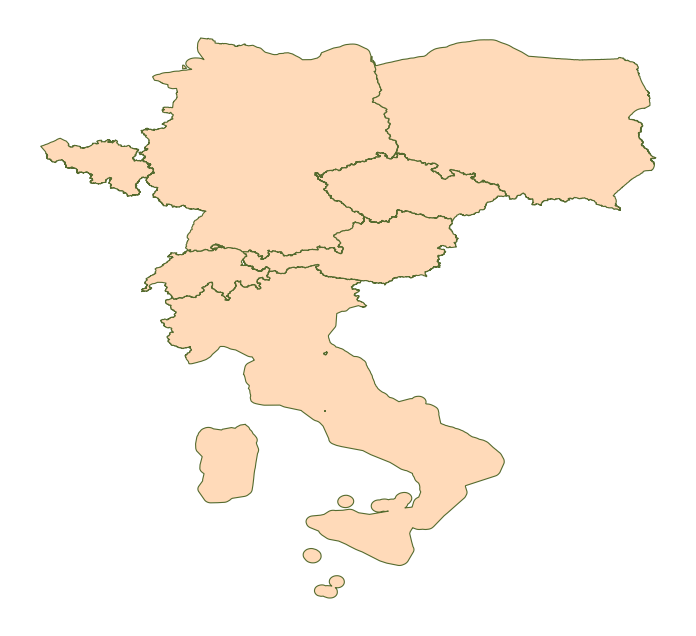

In [42]:
countries = [
    "Germany",
    "Italy",
    "Austria",
    "Switzerland",
    "Poland",
    "Belgium",
    "Czech Republic"
]

gdf = ox.geocode_to_gdf(countries)

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(
    ax=ax,
    color="#FFDAB9",
    edgecolor="#556B2F",
    linewidth=0.8
)

ax.axis("off")
ax.set_aspect("equal")
plt.show()
